# Map of study area

Alex Koiter

## Load Libraries

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Linking to GEOS 3.10.2, GDAL 3.4.3, PROJ 8.2.1; sf_use_s2() is TRUE

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)
Support for Spatial objects (`sp`) will be deprecated in {rnaturalearth} and will be removed in a future release of the package. Please use `sf` objects with {rnaturalearth}. For example: `ne_download(returnclass = 'sf')`

## Important coordinants

Regional site location

In [ ]:
site <- st_sfc(st_point(c(-99.924176, 50.056015)), crs = 4326)
box = c(xmin = -99.99, xmax = -99.924176 + 0.12, ymax = 50.056015 +.065, ymin = 50.056015 - 0.065)

Study plot locations

In [ ]:
# sites <- st_as_sf(data.frame(site = c(1,2,3,4), lat = c(50.052525, 50.052209, 50.059208, 50.060235), long = c(-99.924242, -99.918429, -99.912849, -99.931591)), coords = c("long", "lat"), crs = 4362)
                                                                                              
sites <- data.frame(site = c(1,2,3,4), lat = c(50.052525, 50.052209, 50.059208, 50.060235), long = c(-99.924242, -99.918429, -99.912849, -99.931591))

## Land use data of region

In [ ]:
sf_use_s2(FALSE)

Spherical geometry (s2) switched off

Reading layer `lcv_brandon_2006' from data source 
  `/home/alex/Dropbox/MBFI/MBFI riparian study/riparian-grazing-manuscript/notebooks/Data/lcv_brandon_2006_shp/lcv_brandon_2006.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 145146 features and 5 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 429971 ymin: 5427260 xmax: 510011 ymax: 5542070
Projected CRS: UTM
Reading layer `lcv_minnedosa_2004_2006' from data source 
  `/home/alex/Dropbox/MBFI/MBFI riparian study/riparian-grazing-manuscript/notebooks/Data/lcv_minnedosa_2004_2006_shp/lcv_minnedosa_2004_2006.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 160653 features and 5 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 429972 ymin: 5542070 xmax: 549972 ymax: 5656880
Projected CRS: UTM

although coordinates are longitude/latitude, st_intersection assumes that they
are planar

all geometries

## Canada

In [ ]:
canada <- ne_states(country = "Canada", returnclass = "sf") %>%
  st_transform(crs = 3348)

## Maps

### Land use

In [ ]:
p3 <- ggplot() +
  theme_bw() +
  geom_sf(data = land, aes(fill = Land_use), lwd = 0) +
  scale_fill_manual(values=c("#458B00",  "#CDAD00", "#006400","#009ACD", "#0096D194",  "#C1CDCD"), name = "Land use") +
  geom_point(data = sites, aes(x = long, y = lat), shape = 23, colour = "red", fill = "red", size = 2) +
  coord_sf(ylim = c(49.992, 50.1), xlim = c(-99.965, -99.80418), crs = 4326) +
  scale_y_continuous(expand = c(0,0)) +
  scale_x_continuous(expand = c(0,0)) +
  labs(tag = "b)") +
  annotation_scale(location = "bl",
                   height = unit(0.05, "cm")) +
  annotation_north_arrow(location = "br", 
                         height = unit(0.5, "cm"),
                         width = unit(0.5, "cm")) +
  theme(axis.text = element_blank(),
        axis.ticks = element_blank(),
        axis.title = element_blank(),
        plot.margin = unit(c(0,0,0,0), "mm"))

### Open street

not used

Loading required namespace: raster

Please note that rgdal will be retired during October 2023,
plan transition to sf/stars/terra functions using GDAL and PROJ
at your earliest convenience.
See https://r-spatial.org/r/2023/05/15/evolution4.html and https://github.com/r-spatial/evolution
rgdal: version: 1.6-7, (SVN revision 1203)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.4.3, released 2022/04/22
Path to GDAL shared files: /usr/share/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 8.2.1, January 1st, 2022, [PJ_VERSION: 821]
Path to PROJ shared files: /home/alex/.local/share/proj:/usr/share/proj
PROJ CDN enabled: TRUE
Linking to sp version:2.0-0
To mute warnings of possible GDAL/OSR exportToProj4() degradation,
use options("rgdal_show_exportToProj4_warnings"="none") before loading sp or rgdal.

Zoom: 15

Fetching 10 missing tiles


  |                                                                            
  |                                                                      |   0%
  |                                                                            
  |=======                                                               |  10%
  |                                                                            
  |==============                                                        |  20%
  |                                                                            
  |=====================                                                 |  30%
  |                                                                            
  |============================                                          |  40%
  |                                                                            
  |===================================                                   |  50%
  |                                    

...complete!

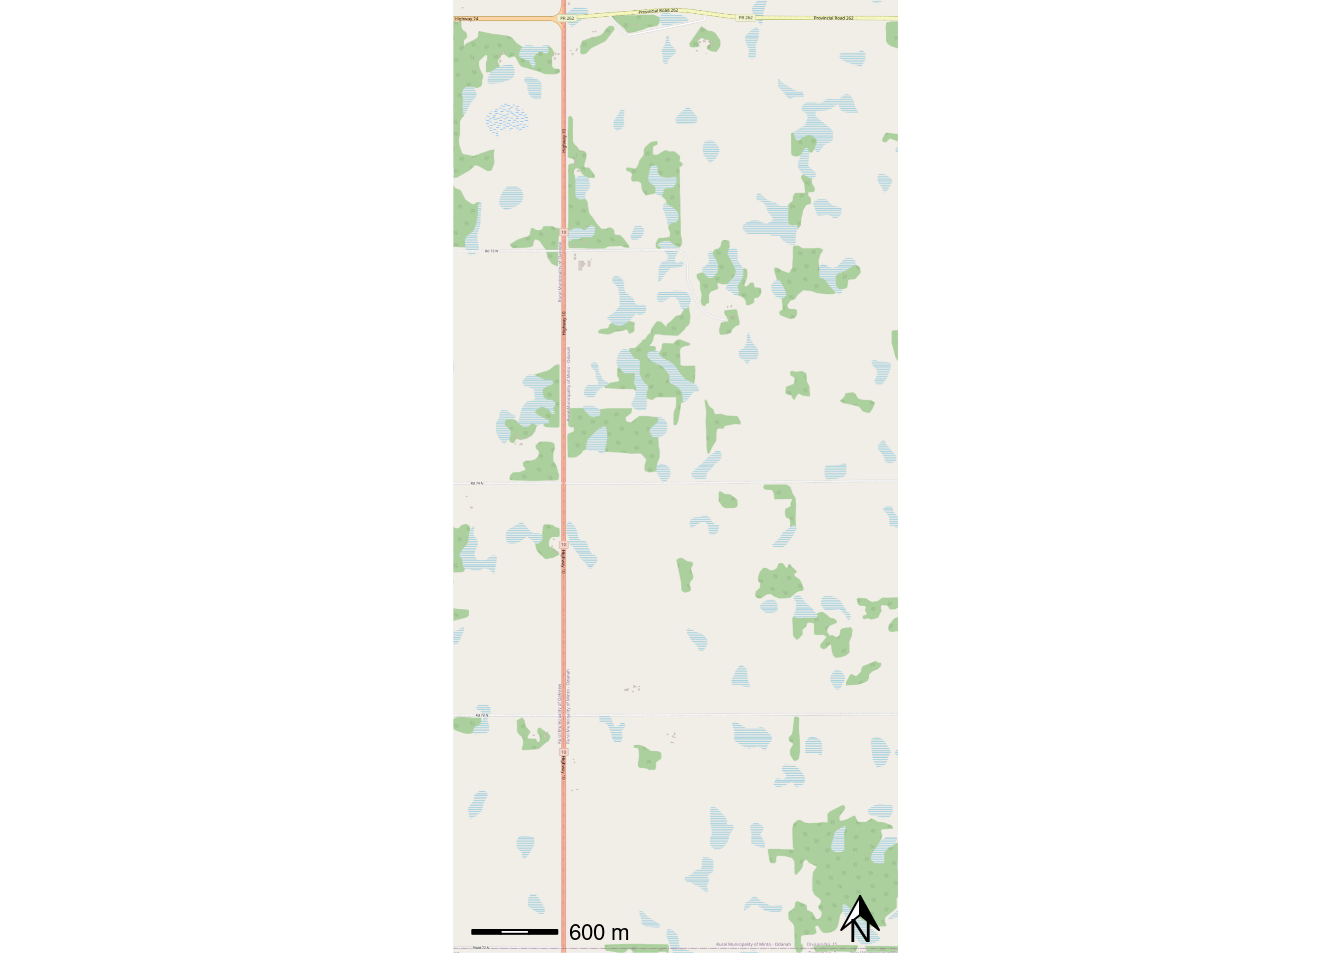

In [ ]:
p2 <- ggplot(site) +
  annotation_map_tile(type = "osm", zoom = 15) +
  geom_point(data = sites, aes(x = long, y = lat), shape = 23, colour = "red", fill = "red", size = 1) +
  #coord_sf(ylim = c(50.056015 +.02, 50.056015 - 0.02), xlim = c(-99.924176 - 0.04, -99.924176 + 0.04), crs = 4326) +
  coord_sf(ylim = c(50.056015 +.01, 50.056015 +.065), xlim = c(-99.924176 - 0.02, -99.924176 + 0.02), crs = 4326) +
  annotation_scale(location = "bl",
                   height = unit(0.05, "cm")) +
  annotation_north_arrow(location = "br", 
                         height = unit(0.5, "cm"),
                         width = unit(0.5, "cm")) +
  theme(axis.text = element_blank(),
        axis.ticks = element_blank(),
        axis.title = element_blank(),
        plot.margin = unit(c(0,0,0,0), "mm"))
p2

### Canada

In [ ]:
p1 <- ggplot() +
  theme_bw() +
  layer_spatial(canada, fill = "white") +
  layer_spatial(site, shape = 23, colour = "red", fill = "red", size = 2) +
  labs(tag = "a)") +
  annotation_scale(location = "bl",
                   height = unit(0.05, "cm")) +
  annotation_north_arrow(location = "br", 
                         height = unit(0.5, "cm"),
                         width = unit(0.5, "cm")) +
  theme(axis.text = element_blank(),
        axis.ticks = element_blank(),
        axis.title = element_blank(),
        plot.margin = unit(c(0,0,0,0), "mm"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank())

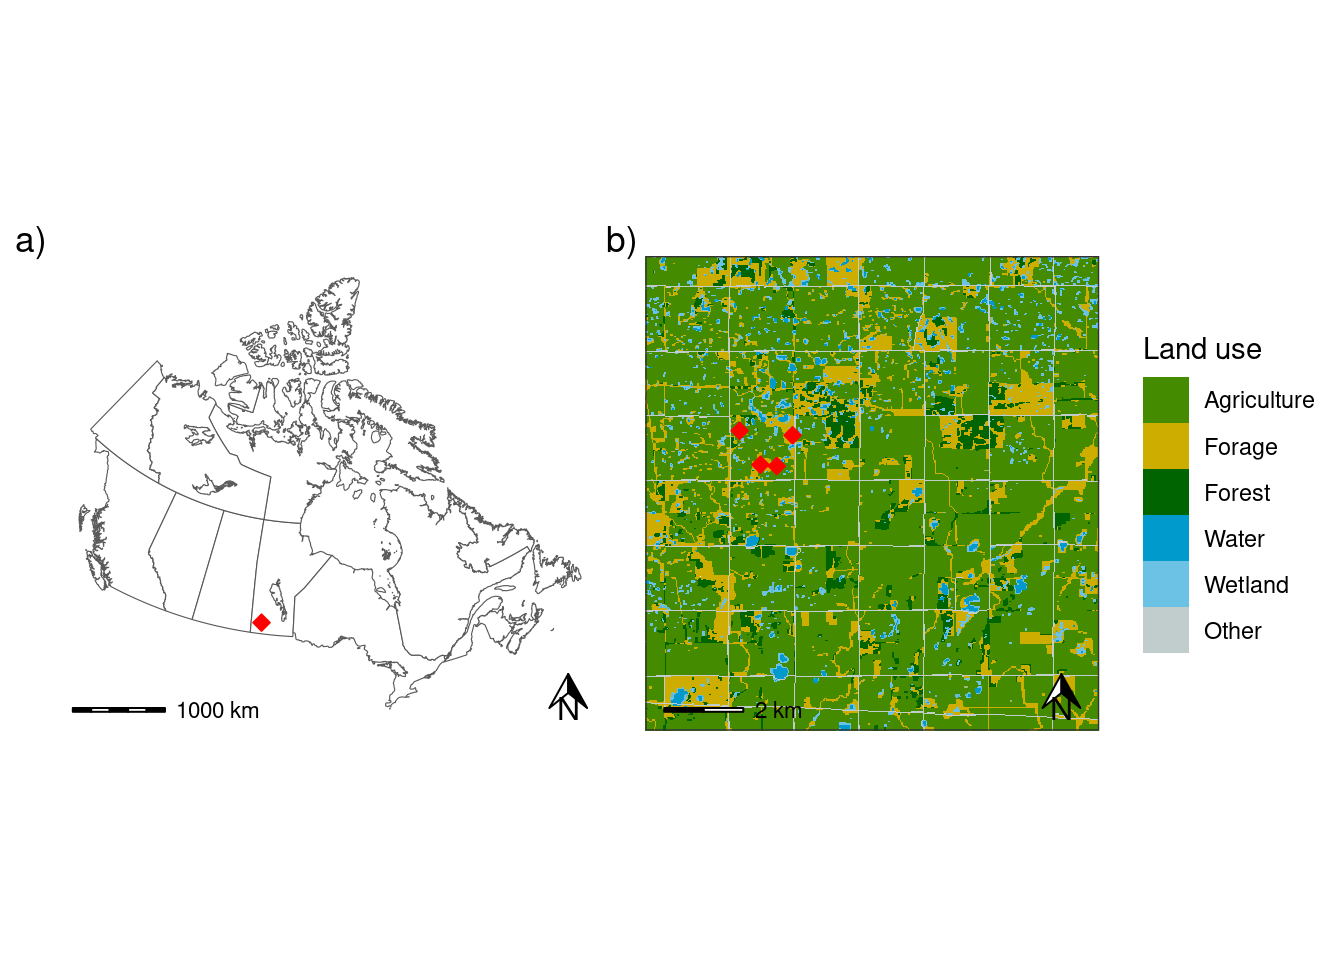

In [ ]:
#| label: fig-map
#| fig-cap: "Showing a) the study site in southwestern Manitoba and b) the four riparian areas included in this study and the regional land use."
#| fig-alt: "Map of Canada with red dot showing location of stite. Regional landuse with red dots showing the location of the four riparian areas included in this study"
#|
p4 <- p1 + p3 + plot_layout(guides = "collect") & theme(legend.position = "right")
p4
#ggsave(filename = "Figures/Maps.png", plot = p4, height = 75, width = 180, units = "mm", dpi = 600)